![Image of Walmart](http://www.negocios360.mx/wp-content/uploads/2016/08/WALMART-LOGO-2.jpg)


En este trabajo se va a analizar un conjunto de datos los cuales son datos tomados de Kaggle.com sobre registros de ventas
en la cadena de supermercados de Walmart.



![Image of Walmart](http://www.iresearchnet.com/wp-content/uploads/2014/05/economics-research-2.jpg)

FlyPolar es una compañia de venta de ropa, que en 2015 vendia alrededor de 250,000 mensuales, pero para julio de 2016 sus ventas cayeron a 50,000. Para mejorar sus ventas implementaron algoritmos de inteligencia artificial, lo que hizo que en un mes las ventas comenzaran a crecer hasta en 100,000 mensuales.

![Image of Walmart](https://nowblitz.com/wp-content/uploads/2015/03/photodune-314121-businessman-taking-phone-call-xs.jpg)

Hasta la fecha la manera de analizar a los clientes para ofrecerles mejores servicios y asi generar mayores ganancias se ha estancado por muchos años en realizar cuestionarios o test de distintos tipos, el problema con estos procesos es que son lentos, pues dependen mucho del analisis humano, esta limitado a la capacidad que tenemos los humanos de analizar volumenes grandes de datos, entre otros factores. Por ello estan apareciendo nuevas tecnologias como Sentient Ascend la cual busca optimizar las llamadas telefonicas, las cuales estan mostrando ser hasta 100 veces mas efectivas que los metodos tradicionales.

Los efectos que puede tener la inteligencia artificial en el comercio es muy importante, pues con ella podemos visualizar mas alla de lo que la capacidad humana nos permite, encontrando mejoras que sin ella hubiera sido practicamente imposible reconocer.




In [21]:
import numpy as np
import pandas as pd
import os

os.chdir('C:/Users/RubenDario/Documents/Reconocimiento de Patrones/Untitled Folder')

df = pd.read_csv("train.csv")

df = df.head(1000)
print(df.describe(), '\n')

        Store         Dept   Weekly_Sales    IsHoliday
count  1000.0  1000.000000    1000.000000  1000.000000
mean      1.0     3.997000   24625.494550     0.070000
std       0.0     1.999747   16160.191742     0.255275
min       1.0     1.000000    -139.650000     0.000000
25%       1.0     2.000000   12386.077500     0.000000
50%       1.0     4.000000   20405.960000     0.000000
75%       1.0     6.000000   36912.142500     0.000000
max       1.0     7.000000  166697.720000     1.000000 



Se tomaron los primeros 1000 registros por problemas de memoria, la columna de Weekly_Sales el minimo es un valor negativo
como la columna es de ventas no tiene ningun sentido hablar de numero negativos, por lo que modificare esos datos.
El resto de las columnas no hay problemas en los datos.

In [22]:
df.loc[df['Weekly_Sales'] < 0,'Weekly_Sales'] = 0
df.describe()

,Store,Dept,Weekly_Sales,IsHoliday
count,1000.0,1000.000000,1000.000000,1000.000000
mean,1.0,3.997000,24625.634200,0.070000
std,0.0,1.999747,16159.978119,0.255275
min,1.0,1.000000,0.000000,0.000000
25%,1.0,2.000000,12386.077500,0.000000
50%,1.0,4.000000,20405.960000,0.000000
75%,1.0,6.000000,36912.142500,0.000000
max,1.0,7.000000,166697.720000,1.000000


In [19]:
df.loc[df['Weekly_Sales'] < 0,'Weekly_Sales'] = df['Weekly_Sales'].mean()
df.describe()

,Store,Dept,Weekly_Sales,IsHoliday
count,1000.0,1000.000000,1000.000000,1000.000000
mean,1.0,3.997000,24650.259695,0.070000
std,0.0,1.999747,16141.166529,0.255275
min,1.0,1.000000,1376.150000,0.000000
25%,1.0,2.000000,12461.547500,0.000000
50%,1.0,4.000000,20423.370000,0.000000
75%,1.0,6.000000,36912.142500,0.000000
max,1.0,7.000000,166697.720000,1.000000


Tome los valores de Weekly_Sales que fueran negativos y los intercambie por 0s o por la media para ver como se comportaban
en cada caso. Al parecer eran muy pocos datos los que eran negativos porque no se mueve mucho los valores. Para esta ocasion
tomare los valores en 0 para no afectar tanto en el caso de que los datos negativos fueran correctos.

Podemos observar que trae los campos:
    Store: el cual es el numero de tienda va de 1 a 45
    Dept: El departamento de cada tienda.
    Date: La semana en la que se tomaron los datos, este dato lo voy a eliminar por el momento porque no estoy seguro
        de como trabajar con lineas de tiempo.
    Weekly Sales: Las ventas que genero el departamento en dicha tienda.
    Holiday: Si esa semana estuvo  en las fechas de ventas altas.

In [23]:
df = df.drop('Date',axis=1)
df.describe()

,Store,Dept,Weekly_Sales,IsHoliday
count,1000.0,1000.000000,1000.000000,1000.000000
mean,1.0,3.997000,24625.634200,0.070000
std,0.0,1.999747,16159.978119,0.255275
min,1.0,1.000000,0.000000,0.000000
25%,1.0,2.000000,12386.077500,0.000000
50%,1.0,4.000000,20405.960000,0.000000
75%,1.0,6.000000,36912.142500,0.000000
max,1.0,7.000000,166697.720000,1.000000


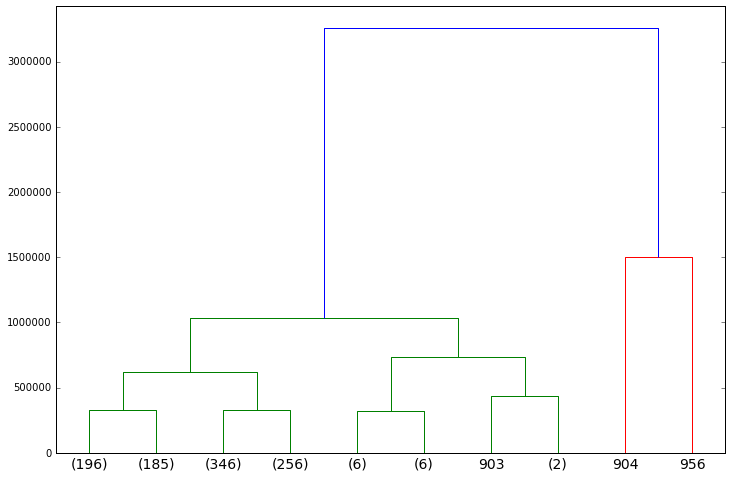

In [24]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
from scipy.spatial import distance


Z = linkage(distance.squareform(distance.pdist(df, 'euclidean')), 'centroid')
plt.figure(figsize=(12, 8))
dendrogram(Z, leaf_font_size=14, truncate_mode = 'lastp', p=10)
plt.show()

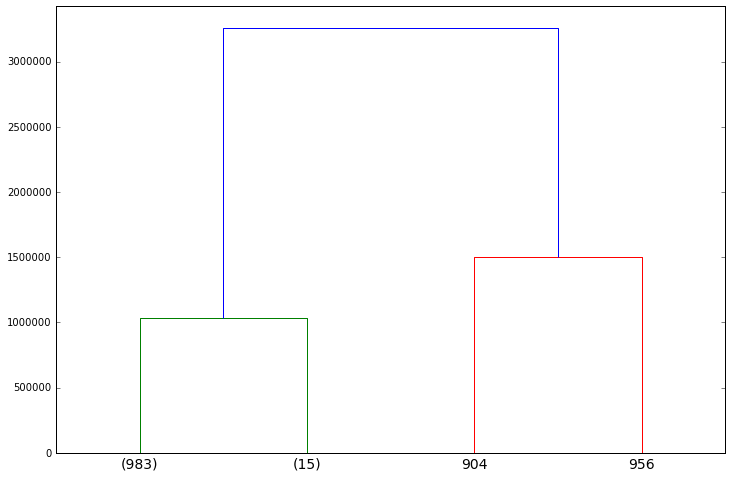

In [27]:
plt.figure(figsize=(12, 8))
dendrogram(Z, leaf_font_size=14, truncate_mode = 'lastp', p=4)
plt.show()

Viendo los dendrogramas pareciera que el numero de clusters deberia ser 4.
Ahora se probara el k means en los datos con los 4 clusters que identificamos

In [28]:
from sklearn import cluster
k_means = cluster.KMeans(n_clusters=4, init='random')
k_means.fit(df) 

print(k_means.cluster_centers_)

[[  1.00000000e+00   4.24736842e+00   1.97347275e+04   5.52631579e-02]
 [  1.00000000e+00   4.72796935e+00   6.92374115e+03   6.51340996e-02]
 [  1.00000000e+00   5.90000000e+00   8.96285910e+04   4.00000000e-01]
 [  1.00000000e+00   3.12320917e+00   4.13268063e+04   8.02292264e-02]]


Analisis del k medias.
Ahora probaremos el ISODATA en los datos para ver como se comportan

In [44]:
import numpy as np
import pandas as pd
import math
import random
import time
import os
import sys
from scipy.spatial import distance
np.set_printoptions(precision=2, suppress=True)


def main():
    LARGER_DISTANCE = sys.maxsize
    TALK = True # TALK = True, imprime resultados parciales
    DATA_SET = df.values
    DATA_LEN = len(DATA_SET)
    K_INIT = 5
    N_MIN = 3
    I_MAX = 10
    S_MAX = 5
    L_MIN = 80
    P_MAX = 2
    data = []
    centroids = []
    members = []
    deltas = []
    num_clusters = 5
    iteration = 0
    SAMPLING_METHOD = 1
    elim = 0
    delta = 0
    KEEP_WALKING = True
    
    #Se inicializan los datos
    initialize_dataset(DATA_LEN, DATA_SET, data)
    #Se inicializan los centroides
    initialize_centroids(TALK, SAMPLING_METHOD, num_clusters, DATA_LEN, DATA_SET, centroids)


    while(iteration < I_MAX and KEEP_WALKING) :
        num_clusters, elim, members, KEEP_WALKING = update_clusters(TALK, DATA_LEN, LARGER_DISTANCE, data, centroids, N_MIN, num_clusters, elim, members)
        if (KEEP_WALKING):
            centroids = update_centroids(TALK, num_clusters, DATA_SET, data)
            deltras, delta = update_deltas(data, DATA_LEN, centroids, num_clusters, members, TALK)
        else :
            if (TALK) : 
                print ("No más cambios.")

        if (num_clusters <= K_INIT / 2) :
            divide_clusters()
        elif (iteration % 2 == 0 or num_clusters > 2 * K_INIT) :
            mix_clusters()
        iteration += 1
    return



# Definir una clase para expresar puntos y su asignación a un cluster
class DataPoint:
    def __init__(self, p):
        self.value = p[:]
        
    def set_value(self, p):
        self.value = p
    
    def get_value(self):
        return self.value
    
    def set_cluster(self, cluster):
        self.cluster = cluster
    
    def get_cluster(self):
        return self.cluster

def initialize_dataset(DATA_LEN, DATA_SET, data):
    for i in range(DATA_LEN):
        point = DataPoint(DATA_SET[i])
        point.set_cluster(None)
        data.append(point)
    return

def initialize_centroids(TALK, SAMPLING_METHOD, num_clusters, DATA_LEN, DATA_SET, centroids):
    if (TALK) : 
        print("Centroides inicializados en:")
    for c in range(num_clusters):
        if (SAMPLING_METHOD == 0) :
            which = random.randint(0,DATA_LEN-1)
        elif (SAMPLING_METHOD == 1):
            which = c
        else :
            which = DATA_LEN-1 - c
                
        centroids.append(list(DATA_SET[which]))
        if (TALK) : 
            print(centroids[c])        
    if (TALK) : 
        print()
    
    return

def update_clusters(TALK, DATA_LEN, LARGER_DISTANCE, data, centroids, N_MIN, num_clusters, elim, members):
    changed = False
    
    if (TALK) :
        print("Actualizando clusters")
    for i in range(DATA_LEN):
        minDistance = LARGER_DISTANCE
        currentCluster = 0
        
        for j in range(num_clusters):
            dist = distance.euclidean(data[i].get_value(), centroids[j])
            if(dist < minDistance):
                minDistance = dist
                currentCluster = j
        
        if(data[i].get_cluster() is None or data[i].get_cluster() != currentCluster):
            data[i].set_cluster(currentCluster)
            changed = True
            
    members = [0] * num_clusters #Que hace esto?
    for i in range(DATA_LEN):
        members[data[i].get_cluster()] += 1
    
    if (TALK) : 
        for j in range(num_clusters):
            print("El cluster ", j, " incluye ", members[j], "miembros.")
        print()
        
    elim = 0
    for j in range(num_clusters):
        if (members[j] < N_MIN):
            if (TALK) :
                print("Eliminando cluster ", j)
            for i in range(DATA_LEN):
                cluster = data[i].get_cluster()
                if (cluster == j-elim) :
                    data[i].set_cluster(None)
                elif (cluster != None and cluster > j-elim) :
                    data[i].set_cluster(cluster-1)
            elim += 1
            members[j] = 0
    
    if (TALK and elim > 0) : 
        for j in range(num_clusters):
            print("El cluster ", j, " incluye ", members[j], "miembros.")
        print()
    num_clusters -= elim

    return num_clusters, elim, members, changed or elim != 0

def update_centroids(TALK, num_clusters, DATA_SET, data, centroids): #Para que ocupaba el global centroids?
    centroids = []

    if (TALK) : 
        print("Los nuevos centroids son:")
    for j in range(num_clusters):
        means = [0] * DATA_SET.shape[1]
            
        clusterSize = 0
        for k in range(len(data)):
            if(data[k].get_cluster() == j):
                p = data[k].get_value()
                for i in range(DATA_SET.shape[1]):
                    means[i] += p[i]
                clusterSize += 1

        if(clusterSize > 0):
            for i in range(DATA_SET.shape[1]):
                means[i] = means[i] / clusterSize
            centroids.append(means)

        if (TALK) : 
            print(centroids[j])        
    if (TALK) : 
        print()
    
    return centroids

def update_deltas(data, DATA_LEN, centroids, num_clusters, members, TALK, delta):
    deltas = [0] * num_clusters
    delta = 0
    
    for i in range(DATA_LEN):
        cluster = data[i].get_cluster()
        deltas[cluster] += distance.euclidean(data[i].get_value(), centroids[cluster])
    mem = 0
    for i in range(num_clusters):
        delta += deltas[i]
        mem += members[i]
        deltas[i] /= members[i]
        if (TALK) : 
            print("Distancia promedio en el cluster {}:".format(i), deltas[i])        
    delta /= mem
    if (TALK) : 
        print("Distancia promedio global: {}\n".format(delta))
    
    return deltas, delta

def divide_clusters(DATA_SET, DATA_LEN, data, centroids, K_INIT, N_MIN, num_clusters):
    # Cálculo de desviaciones estandar
    sigma_vect = [[0] * DATA_SET.shape[1]] * num_clusters
    for d in range(DATA_LEN):
        cluster = data[d].get_cluster()
        p = data[d].get_value()
        for i in range(DATA_SET.shape[1]):
            sigma_vect[cluster][i] += (p[i] - centroids[cluster][i])**2        
    candidates = []
    for cluster in range(num_clusters):
        for i in range(DATA_SET.shape[1]):
            sigma_vect[cluster][i] = math.sqrt(sigma_vect[cluster][i]) / members[cluster]
            if (sigma_vect[cluster][i] > S_MAX):
                candidates.append(cluster)
                break # Sucio... pero eficiente :-)
    
    divided = False
    for cluster in candidates:
        cond = num_clusters < K_INIT/2 or (deltas[cluster] > delta and members[cluster] > N_MIN)
        if(cond) :
            centroids.pop(cluster)
            points = []
            for d in range(DATA_LEN):
                if (data[d].get_cluster() == cluster):
                    points.append(data[d].get_value())
            dist = distance.squareform(distance.pdist(points, 'euclidean'))
            idx = (dist==dist.max()).argmax()
            z1 = list(points[idx // len(points)])
            z2 = list(points[idx % len(points)])
            if (TALK) :
                print("Se dividirá el cluster {}.\nSe crearán nuevos clusters en {} y {}.\n"
                     .format(cluster, z1, z2))
            centroids.append(z1)
            centroids.append(z2)
            num_clusters += 1
            divided = True

    if (divided) :
        update_clusters(TALK, DATA_LEN, LARGER_DISTANCE, num_clusters, data, centroids, members, N_MIN)
        update_centroids(TALK, SAMPLING_METHOD, num_clusters, DATA_LEN, DATA_SET, centroids)
    
    return num_clusters

def mix_clusters(L_MIN, DATA_SET, TALK):
    global centroids, num_clusters
    dist = distance.squareform(distance.pdist(centroids, 'euclidean'))
    flag = math.floor(dist.max() * 10)
    dist[dist == 0] = flag
    
    mixed = False
    while (dist.min() < flag):
        idx = (dist==dist.min()).argmax()
        z1 = idx // len(centroids)
        z2 = idx % len(centroids)
        
        if (dist.min() < L_MIN):
            dist[z1] = flag
            dist[:,z1] = flag
            dist[z2] = flag
            dist[:,z2] = flag
            z = [sum(x)/2 for x in zip(centroids[z1], centroids[z2])]
            centroids[z1] = z
            centroids[z2] = [LARGER_DISTANCE]*DATA_SET.shape[1]
            num_clusters -= 1

            mixed = True
            if(TALK):
                print("Unificando clusters {} y {}\nSe creará nuevo centroide en {}\n"
                      .format(z1, z2, z))
        else :
            dist[z1][z2] = flag
            dist[z2][z1] = flag
        
    if (mixed) :
        update_clusters(TALK, DATA_LEN, LARGER_DISTANCE, num_clusters, data, centroids, members, N_MIN)
        update_centroids(TALK, SAMPLING_METHOD, num_clusters, DATA_LEN, DATA_SET, centroids)

    return
    
if __name__ == "__main__":
    main()

Centroides inicializados en:
[1.0, 1.0, 24924.5, 0.0]
[1.0, 1.0, 46039.489999999998, 1.0]
[1.0, 1.0, 41595.550000000003, 0.0]
[1.0, 1.0, 19403.540000000001, 0.0]
[1.0, 1.0, 21827.900000000001, 0.0]

Actualizando clusters


NameError: name 'num_clusters' is not defined